In [1]:
!pip install tensorflow==2.0.0-rc0

     |████████████████████████████████| 86.3MB 40kB/s 
     |████████████████████████████████| 501kB 37.6MB/s 
     |████████████████████████████████| 4.3MB 32.0MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  ## To convert images into arrays 

**Importing Data from Github**

In [5]:
!git clone https://github.com/skn1998/dog-cat-full-dataset.git

fatal: destination path 'dog-cat-full-dataset' already exists and is not an empty directory.


In [0]:
train_data_dir = '/content/dog-cat-full-dataset/data/train'
test_data_dir = '/content/dog-cat-full-dataset/data/test'

In [0]:
img_width = 32
img_height = 32
batch_size = 20

In [0]:
datagen = ImageDataGenerator(rescale=1/255)

In [9]:
train_generator = datagen.flow_from_directory(directory=train_data_dir, target_size=(img_height, img_width), class_mode='binary', batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [10]:
test_generator = datagen.flow_from_directory(directory=test_data_dir, target_size=(img_height, img_width), class_mode='binary', batch_size=batch_size)

Found 5000 images belonging to 2 classes.


In [11]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [12]:
test_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

**CNN Model**

In [0]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(img_height, img_width, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs=10)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1000/1000 [==============================] - 244s 244ms/step - loss: 0.6231 - accuracy: 0.6496
Epoch 2/10
1000/1000 [==============================] - 239s 239ms/step - loss: 0.4869 - accuracy: 0.7659
Epoch 3/10
1000/1000 [==============================] - 243s 243ms/step - loss: 0.4272 - accuracy: 0.8016
Epoch 4/10
1000/1000 [==============================] - 244s 244ms/step - loss: 0.3710 - accuracy: 0.8329
Epoch 5/10
1000/1000 [==============================] - 242s 242ms/step - loss: 0.3098 - accuracy: 0.8658
Epoch 6/10
1000/1000 [==============================] - 241s 241ms/step - loss: 0.2401 - accuracy: 0.9002
Epoch 7/10
1000/1000 [==============================] - 241s 241ms/step - loss: 0.1787 - accuracy: 0.9269
Epoch 8/10
1000/1000 [==============================] - 240s 240ms/step - loss: 0.1319 - accuracy: 0.9470
Epoch 9/10
1000/1000 [==============================] - 24

In [0]:
## Accuracy score with Number of Epochs

Text(0, 0.5, 'Accuracy')

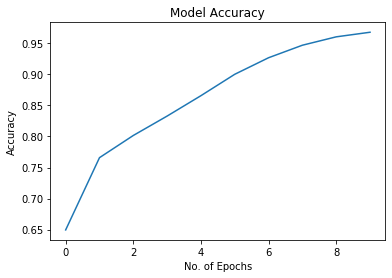

In [20]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

In [0]:
## Loss with Number of Epochs

Text(0, 0.5, 'Loss')

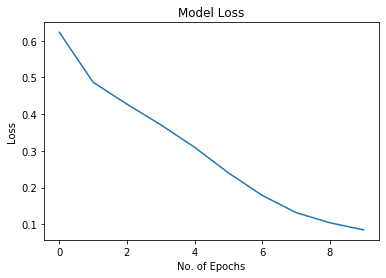

In [22]:
plt.figure()
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')

In [0]:
from sklearn.metrics import accuracy_score

In [24]:
y_pred_prob = model.predict_generator(generator=test_generator, steps=len(test_generator))
y_pred_prob[1]

array([0.95741236], dtype=float32)

In [0]:
y_pred=[]
for item in y_pred_prob:
    if item[0]<0.5:
      y_pred.append(0)
    else:
      y_pred.append(1)

In [26]:
print(accuracy_score(test_generator.classes, y_pred))

0.482


**CNN Model with Dropout and Batch Normalization**

In [0]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(img_height, img_width, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)        

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs=10)

Epoch 1/10
1000/1000 [==============================] - 319s 319ms/step - loss: 0.6480 - accuracy: 0.6432
Epoch 2/10
1000/1000 [==============================] - 317s 317ms/step - loss: 0.5581 - accuracy: 0.7125
Epoch 3/10
1000/1000 [==============================] - 317s 317ms/step - loss: 0.5156 - accuracy: 0.7415
Epoch 4/10
1000/1000 [==============================] - 316s 316ms/step - loss: 0.4809 - accuracy: 0.7691
Epoch 5/10
1000/1000 [==============================] - 317s 317ms/step - loss: 0.4643 - accuracy: 0.7753
Epoch 6/10
1000/1000 [==============================] - 318s 318ms/step - loss: 0.4499 - accuracy: 0.7872
Epoch 7/10
1000/1000 [==============================] - 318s 318ms/step - loss: 0.4335 - accuracy: 0.7976
Epoch 8/10
1000/1000 [==============================] - 319s 319ms/step - loss: 0.4197 - accuracy: 0.8114
Epoch 9/10
1000/1000 [==============================] - 320s 320ms/step - loss: 0.4127 - accuracy: 0.8094
Epoch 10/10
1000/1000 [=======================

In [0]:
## Accuracy score with Number of Epochs

Text(0, 0.5, 'Accuracy')

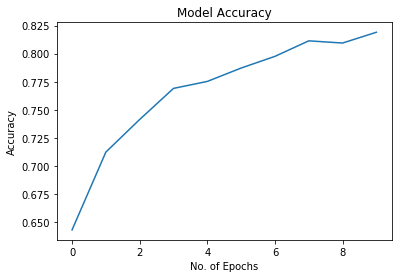

In [32]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

In [0]:
## Loss with Number of Epochs

Text(0, 0.5, 'Loss')

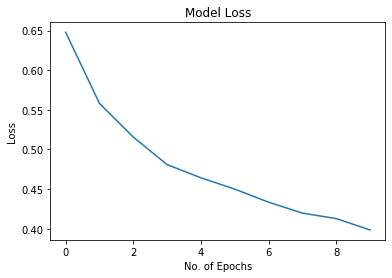

In [34]:
plt.figure()
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')

In [0]:
y_pred_prob = model.predict_generator(generator=test_generator, steps=len(test_generator))

In [0]:
y_pred=[]
for item in y_pred_prob:
    if item[0]<0.5:
      y_pred.append(0)
    else:
      y_pred.append(1)

In [38]:
print(accuracy_score(test_generator.classes, y_pred))

0.4924
